In [61]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import rocks
rocks.set_log_level("error")
import time as t

import subprocess

# from astropy.time import Time
# import requests
# import io

# import astropy.units as u
# from astropy.coordinates import SkyCoord
# from astropy.coordinates import angular_separation

# from scipy.signal import argrelextrema


# from fink_utils.sso import spins as finkus
# import ssptools

In [2]:
# DAMIT
path_damit = '/astrodata/Catalog/DAMIT/damit20230418/'
path_spins = './'

# Read data

In [54]:
# Read DAMIT Tables
ssos = pd.read_csv(f'{path_damit}tables/asteroids.csv')
models = pd.read_csv(f'{path_damit}tables/asteroid_models.csv')
refs = pd.read_csv(f'{path_damit}tables/asteroid_models_references.csv')
bibs = pd.read_csv(f'{path_damit}tables/references.csv')

In [55]:
# Select columns for ASTEROIDS
ssos = ssos[ ['id', 'number', 'name', 'designation'] ]
ssos.columns = ['asteroid_id', 'number', 'name', 'designation']

In [56]:
# Select columns for MODELS
models = models[ [ 'id', 'asteroid_id', 'lambda', 'beta', 'period' ] ]
models.columns = [ 'model_id', 'asteroid_id', 'lambda', 'beta', 'period' ]

In [57]:
# Select columns for REFERENCES
refs = refs[ ['asteroid_model_id','reference_id'] ]
refs.columns = ['model_id','reference_id']

In [58]:
# Select columns for BIBLIOGRAPHY
bibs = bibs[ ['id', 'bibcode'] ]
bibs.columns = ['reference_id', 'bibcode']

In [59]:
# Merge everything
data = models.merge( ssos, on='asteroid_id')
data = data.merge( refs, on='model_id')
data = data.merge( bibs, on='reference_id')
data

,model_id,asteroid_id,lambda,beta,period,number,name,designation,reference_id,bibcode
0,101,101,35,-12,7.813230,2.0,Pallas,NaN,106,2003icar..164..346t
1,106,104,340,42,7.274471,6.0,Hebe,NaN,106,2003icar..164..346t
2,110,106,335,-5,12.866670,8.0,Flora,NaN,106,2003icar..164..346t
3,111,107,180,22,5.079176,9.0,Metis,NaN,106,2003icar..164..346t
4,117,111,98,57,7.443224,19.0,Fortuna,NaN,106,2003icar..164..346t
...,...,...,...,...,...,...,...,...,...,...
6230,6198,3569,104,-43,16.438100,949.0,Hel,NaN,662,2021a&a...654a..48h
6231,6199,3570,219,-46,9.606520,971.0,Alsatia,NaN,662,2021a&a...654a..48h
6232,6200,3570,85,-57,9.606580,971.0,Alsatia,NaN,662,2021a&a...654a..48h
6233,6201,3571,237,32,947.700000,988.0,Appella,NaN,662,2021a&a...654a..48h


# Compute R

In [82]:
for i, r in data.iterrows():
    # print(i, r['number'], r['name'])
 
    f_shape = f"{path_damit}files/asteroid_{r['asteroid_id']}/model_{r['model_id']}/shape.txt"
    result = subprocess.run(['shape_R.sh',f_shape], stdout=subprocess.PIPE)

    data.loc[i,'R'] = float(result.stdout.decode('utf-8'))

In [91]:
data.to_csv( './data/damit.csv', index=False)

# Plot!

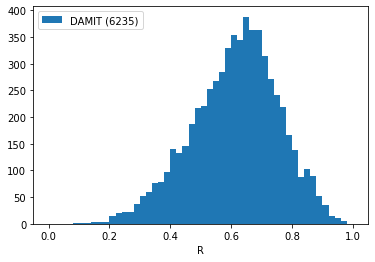

In [89]:
fig, ax = plt.subplots()

r = [0,1]
b = 50
ax.hist( data.R, range=r, bins=b, label=f'DAMIT ({len(data)})' )
ax.set_xlabel('R')
ax.legend(loc='upper left')